# Regression Analysis


#  Code and Report

Connect gdrive for train/test datasets:

In [1]:
from google.colab import drive # import lib
drive.mount("/content/gdrive") # mount gdrive

Mounted at /content/gdrive


Import libraries:

In [8]:
import numpy as np # for np array ops
import matplotlib.pyplot as plt # for visualization purposes
from pandas import * # for reading and parsing .csv files
import random # for shuffling dataset at each iteration

Read .csv from gdrive and parse "x" and "t" into two lists:

Length of Training Dataset:  150
Training data visualized (x axis: X, y axis: T:
Length of Test Dataset:  100
Test dataset visualized (x axis: X, y axis: T:


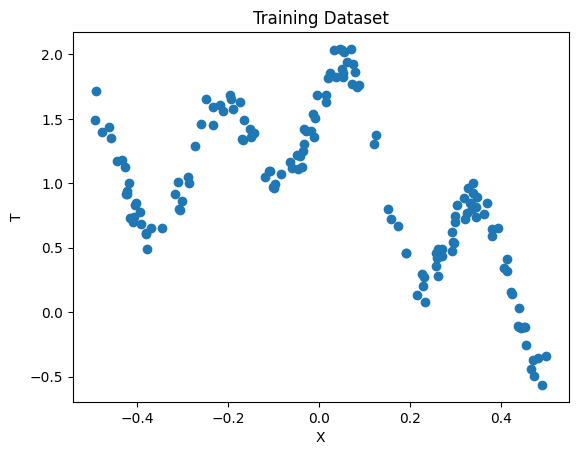

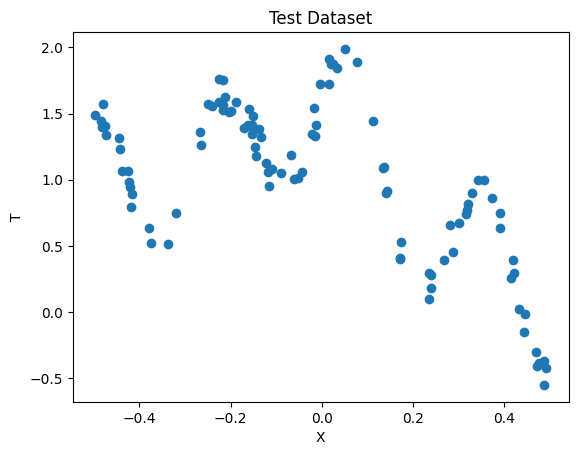

In [10]:
sTrainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv" # address of train.csv on gdriveg
sTestAdd  = "/content/gdrive/MyDrive/cmp712/hw1/test.csv" # address of test.csv on gdriveg
data = read_csv(sTrainAdd) # read train.csv
X = data['x'] # assign training dataset arguments into X
T = data['t'] # assign training dataset values into T
TRAIN_DATASET_LENGTH = len(X) # get length of dataset
data_test = read_csv(sTestAdd) # read train.csv
X_test = data_test['x'] # assign test dataset arguments into X_test
T_test = data_test['t'] # assign test dataset values into T_test
TEST_DATASET_LENGTH = len(X_test) # get length of dataset
print('Length of Training Dataset: ', TRAIN_DATASET_LENGTH)
print('Training data visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Training Dataset")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X, T) # visualize training data
print('Length of Test Dataset: ', TEST_DATASET_LENGTH)
print('Test dataset visualized (x axis: X, y axis: T:')
plt.figure()
plt.title("Test Dataset")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X_test, T_test) # visualize test data

# Trainer and Helper Methods

*calcLossPartialDeriv:* Generic method to calculate partial derivatives of Mean Squared Error (of loss function) wrt to polynomial parameters (Note that this method is built generic in order to ease the process of testing polynomials with different order, even though this method slows down the code):

In [11]:
def calcLossPartialDeriv(T_truth, T_Pred, x, nOrder):
  res = (-2) * (T_truth - T_Pred) * x**nOrder
  return res

*calcPoly:* Generic method to calculate polynomials of different orders:

In [12]:
def calcPoly(x, params):
  sum = 0
  nOrder = len(params) - 1
  for n in range(0, len(params)):
    sum += params[n] * np.power(x, nOrder - n)
  return sum

*calcLoss:* Method to calculate loss as Mean Squared Error (MSE):

In [14]:
def calcLoss(truth, pred, vParams, nReg):
  loss = 1/truth.size * np.sum(np.power(truth - pred, 2)) + nReg * sum(vParams)/len(vParams)
  return loss

*trainer:* Trainer method with following properties:


*   Stochastic online update with gradient descent is used.
*   Dataset is shuffled at each iteration



In [21]:
def trainer(X, T, nLearningRate, nPolyOrder, nIterLim, nReg):
  vLoss_training = np.zeros(nIterLim) # vector of training MSE losses
  vLoss_test = np.zeros(nIterLim) # vector of test MSE losses
  vPolyParams = np.zeros(nPolyOrder + 1) # Polynomial constants stored in np array
  vPolyParams = np.random.rand(nPolyOrder + 1)
  vLossPartialDerivs = np.zeros(nPolyOrder + 1) # Partial derivatives of loss function stored in np array
  nIter = 0 # Iteration counter
  while (nIter<nIterLim): # train until certain number of iterations reached
    temp = list(zip(X, T)) # following 4 lines are for shuffling dataset at the beginning of each iteration
    random.shuffle(temp)
    X, T = zip(*temp)
    X, T = np.array(X), np.array(T)
    for idx in range(TRAIN_DATASET_LENGTH): # prediction loop
      T_Pred = calcPoly(X[idx], vPolyParams) # calculate predictor's values
      for i in range(0, nPolyOrder+1): # calculate derivatives and update parameters
        vLossPartialDerivs[i] = calcLossPartialDeriv(T[idx], T_Pred, X[idx], nPolyOrder-i) # calculate partial derivatives
      vPolyParams = vPolyParams - nLearningRate * vLossPartialDerivs # update polynomial parameters
    vLoss_training[nIter] = calcLoss(T, calcPoly(X, vPolyParams), vPolyParams, 0) # calculate and save training loss
    vLoss_test[nIter] = calcLoss(T_test, calcPoly(X_test, vPolyParams), vPolyParams, 0) # calculate and save test loss
    nIter = nIter + 1 # increase iteration index
    if(nIter%(nIterLim * 0.05)==0): # show progress at each %5 interval
        print("progress: %", int(nIter/nIterLim * 100), "Training Loss=", vLoss_training[nIter - 1], "Params=", vPolyParams) # print progress, training loss and polynomial parameters
  return vPolyParams, vLoss_training, vLoss_test

# Report
Following decisions are made:


*   Looking the data, I tried to overfit the model to the data
*   Tried different polynomial orders, increasing polynomial order excessively didn't help. At final, order of 9 is used.
*   Learning rate is chosen as not to lead overshoot on loss function during iterations.
*   Different number of iterations are tried. Most up was 2 millions, but result didn't change.
*   Based on nature of data, stochastic online update is used.

Basically, algorithm works as following:


*   Initialize variables
*   Shuffle dataset at each iteration
*   Make prediction
*   Calculate loss gradients
*   Update parameters
*   Calculate training and test losses for very iteration

Notes on performance of algorithm:


*   As mentioned earlier, I implemented generic methods for calculating gradients and polynomial values, in order to work with different order of polynomials. Nevertheless, this effects the code's performance, takes longer time.
*   I observed that shuffling the array before each iteration has a positive effect
*   Stochastic online update is a good method for this problem, as before I tried batch updates and no fitting to data is observed.
*   Regularization term is set to zero as I tried to overfit the model

Comments on results:


*   Training and test regression showed that the model is not fit completely to training and test datasets.
*   Training and test losses show that even though the curves seems converged, there is a residual error for both of them.
*   Training model for longer might increase performance, but I don't think it would solve the residual error.
*   As a final note, honestly I don't know what to do more to train the model to fit to these dataset.















Hyperparameters:

In [26]:
LEARNING_RATE = 0.006
REGULARIZATION = 0 # Regularization term
POLY_ORDER = 9 # Order of model
LIM_ITER = 500000 # 500.000 iterations

Trainer wrapper:

In [24]:
vPolyParams, vLoss_training, vLoss_test = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_ITER, REGULARIZATION) # train
print(vPolyParams)

progress: % 5 Training Loss= 0.12238567485075579 Params= [ 0.08454187  1.4823449  -2.36724738  4.86459484 -6.50782558 13.88633862
 -3.44741548 -7.88692202 -0.26618056  1.45789405]
progress: % 10 Training Loss= 0.119128604883359 Params= [ -0.70885504   1.65548169  -4.90659091   5.89321867 -11.81278761
  19.37705463  -2.10977646  -9.06094366  -0.31137654   1.50223441]
progress: % 15 Training Loss= 0.11749158879982181 Params= [ -1.46525878   1.52672511  -7.32710643   5.79552586 -16.83011042
  21.57483222  -0.65202224  -9.50463439  -0.3834447    1.49247118]
progress: % 20 Training Loss= 0.1159447747855712 Params= [ -2.18360799   1.29253784  -9.62436979   5.30322762 -21.55493699
  22.61583921   0.78700221  -9.68932659  -0.46446997   1.50867395]
progress: % 25 Training Loss= 0.11491361189308602 Params= [ -2.86515893   1.02173491 -11.80207614   4.6726971  -25.99743263
  23.24806654   2.1669798   -9.78444739  -0.54423111   1.49542422]
progress: % 30 Training Loss= 0.11362915656787015 Params= [

Visualize Results:

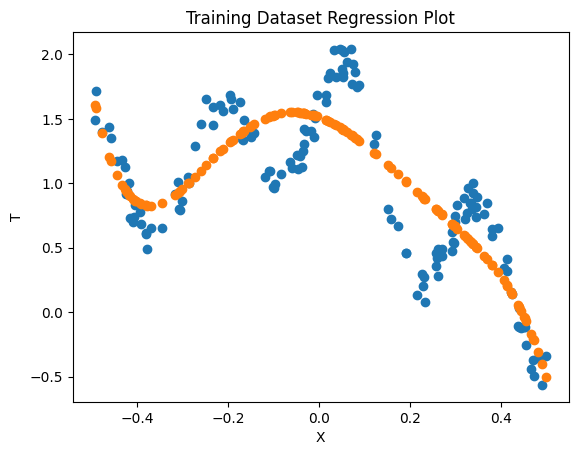

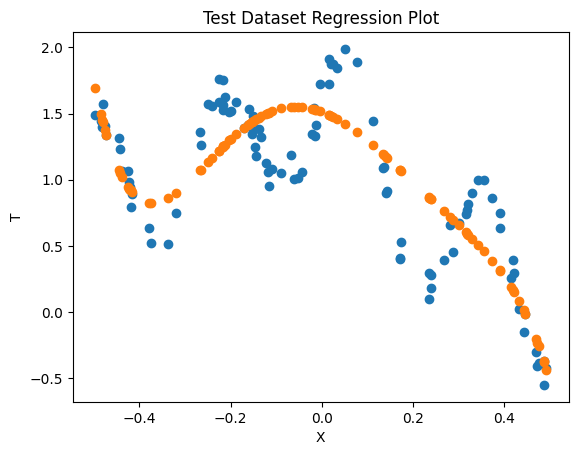

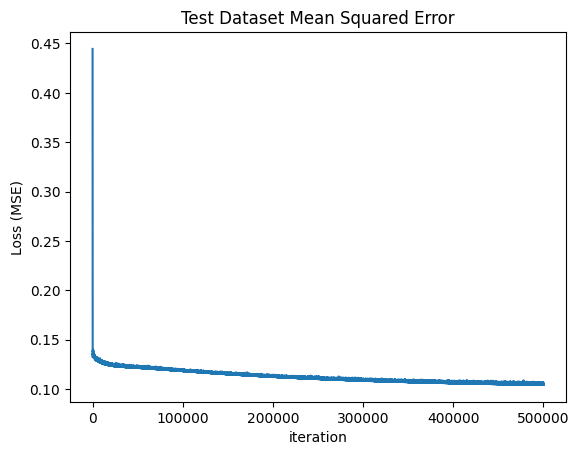

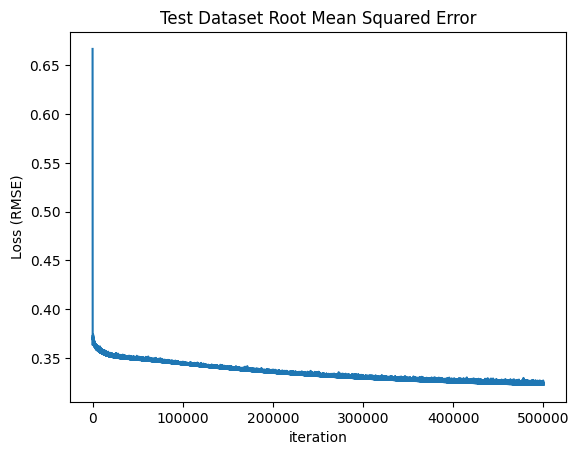

In [25]:
vIdx = sorted(range(len(X)), key=lambda k: X[k])
X = X[vIdx]
T_Pred = calcPoly(X, vPolyParams)
T_Pred = T_Pred[vIdx]
T = T[vIdx]
vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
X_test = X_test[vIdx_test]
T_Pred_test = calcPoly(X_test, vPolyParams)
T_Pred_test = T_Pred_test[vIdx_test]
T_test = T_test[vIdx_test]
plt.figure()
plt.title("Training Dataset Regression Plot")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X, T) 
plt.scatter(X, T_Pred)
plt.figure()
plt.title("Test Dataset Regression Plot")
plt.xlabel("X")
plt.ylabel("T")
plt.scatter(X_test, T_test)
plt.scatter(X_test, T_Pred_test)
plt.figure()
plt.title("Test Dataset Mean Squared Error")
plt.xlabel("iteration")
plt.ylabel("Loss (MSE)")
plt.plot(vLoss_test)
plt.figure()
plt.title("Test Dataset Root Mean Squared Error")
plt.xlabel("iteration")
plt.ylabel("Loss (RMSE)")
plt.plot(np.sqrt(vLoss_test))